<a href="https://colab.research.google.com/github/Kevin2558/Data_Science_Borrador/blob/main/02_Preprocesamiento/Log_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log-Transform

En muchos datasets reales, especialmente en problemas financieros, económicos o de reisgo, es común encontrar variables numpericas con distribuciones altamente sesgadas. Este sesgo puede afectar negativamente el desempeño de ciertos modelos de ML y la interpretatividad de los datos.

La transformación logarítmica es una técnica clásica de preprocesamiento que permite:

- Reducir la asimetría en la distribución de los datos.
- Comprimir valores extremos (outliers) hacia el centro.
- Facilitar el modelado en algoritmos sensibles a la escala o a la distribución, como la regresión lineal.

Carguemos el dataset que utilizaremos para poner en ejecución el log-transform.

In [ ]:
import kagglehub

# Downoad latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


Visualicemos el dataset.

In [ ]:
import pandas as pd
df = pd.read_csv(path + '/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Como podemos notar los costos médicos no tienen una forma normal, por lo que partiremos haciendo una limpieza para luego aplicar una log-transform.

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

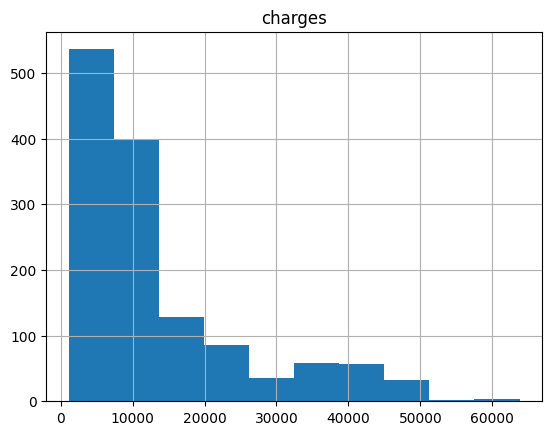

In [ ]:
df.hist(['charges'])

Aseguremonos de que el dataset no posea valores nulos que entorpezcan el análisis.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Diferenciamos nuestra variable objetivo de las variables que usaremos para realizar el entrenamiento y predicción.

In [ ]:
y_raw = df['charges']
X = df.drop('charges', axis=1)

Realizaremos la división del dataset a través de la funcionalidad train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

Lo siguiente nos permite para separar los datos entre entrenamiento y testeo, para poder predecir. test_size corresponde al tamaño de la muestra para testeo y random_state una semilla.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_raw, test_size=0.2, random_state=42)

Separaremos las variables numéricas de las categóricas para realizar el preprocesamiento de las mismas.

In [ ]:
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

Construyamos el preprocesamiento de los datos.

In [ ]:
pre = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

Definamos nuestro pipeline del modelo. Podemos entregarle un modelo y en este caso lo haremos con el modelo de regresión lineal.

In [ ]:
pipeline = Pipeline([
    ('pre', pre),
    ('lr', LinearRegression())
])

Modelo sin LOG

Partiremos haciendo el modelado sin aplicar el log-transform

Entrenamiento del modelo.

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('lr', LinearRegression())])

Predicción del modelo.

In [ ]:
pred = pipeline.predict(X_test)

Visualicemos las predicciones obtenidas.

In [ ]:
pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

# Métricas

Ahora procedamos a realizar la evaluación de las predicciones realizadas a través de una serie de métricas que nos dirán que tan buena fue la predicción de nuestro modelo.

In [ ]:
import numpy as np

Esto seria hacerlo de forma manual

In [ ]:
rmse = np.sqrt(np.mean((y_test - pred)**2))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

Por otro lado, sklearn ya trae metricas por lo que podemos utilizarlo

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))

Visualicemos el error de la predicción.

In [ ]:
rmse

np.float64(5796.284659276274)

Como vimos en el histograma, existen muchos valores muy diferentes, no es lo mismo tener un error de 5 mil dolares en personas que pagan al rededor de 10 mil dolares a las que pagan 60 mil dolares, donde podria ser considerado un error despreciable.

Es por esto que nos gustaria estandarizar con el logaritmo para mejorar el error.

Modelo con LOG

Ahora precederemos a realizar el mismo proceso pero aplicando la log-transform.

In [ ]:
y_log = np.log1p(y_train)

Lo de utilizar log1 es para evitar los valores 0, ya que suma uno a la entrada

Aplicamos logaritmo a los datos de testeo.

In [ ]:
y_test_log = np.log1p(y_test)

Entrenamiento del modelo.

In [ ]:
pipeline.fit(X_train, y_log)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('lr', LinearRegression())])

Predicción del modelo.

In [ ]:
pred_log = pipeline.predict(X_test)

Visualicemos las predicciones realizadas.

In [ ]:
pred_log

array([ 9.11470731,  8.6312095 , 11.09876796,  9.11839303,  9.55219508,
        8.68986209,  7.94709785,  9.62278874,  8.24058951,  9.26115706,
       10.03768466,  8.9206697 ,  8.39848779, 10.81609917, 10.99873078,
       10.71154547,  9.3536842 , 10.66203363,  8.95959612, 10.37976396,
        8.49301277,  8.95035579,  7.91388054,  8.3413422 ,  9.36196509,
        9.34007417,  9.45588693,  8.60549033,  9.20256252,  7.86260568,
        9.06192381,  9.37475977,  8.10396519,  8.56609522,  8.24052818,
        9.05450157,  8.0947014 ,  8.89554032, 10.74286243, 10.19164467,
        8.42581974,  8.18805829,  9.42087237,  9.28235725,  8.63730909,
        9.336394  ,  8.35156627,  8.38793507, 10.62662244,  8.60473398,
        9.56141981,  7.94455367,  9.01561096,  7.94403299,  9.22200041,
        9.30588689,  8.34584905, 10.27390191,  9.36021228,  9.31358734,
        9.51372495,  8.70914035,  9.70666083,  8.95300656,  9.24705133,
        8.39417039,  9.83963809,  9.25310474,  8.24494682,  8.14

Notemos que ahora son valores que son mucho mas pequeños.

Calculemos la desviacion estandar de la prediccion para poder devolver la transformacion.

In [ ]:
sigma2 = np.var(y_test_log - pred_log)

In [ ]:
sigma2

0.17381846668438658

Con lo siguiente devolvemos la transformacion y obtenemos los datos reescalados.

In [ ]:
pred_back = np.expm1(pred_log+0.5*sigma2)

In [ ]:
pred_back

array([ 9912.14114661,  6111.66872302, 72089.47378204,  9948.74564269,
       15352.58563395,  6480.91533067,  3083.07508965, 16475.62475628,
        4135.0592634 , 11475.60962555, 24948.12147027,  8163.72998582,
        4842.52008458, 54338.59371934, 65226.73298598, 48944.10819037,
       12588.18552867, 46579.76010462,  8487.8206322 , 35124.16813157,
        5322.69026608,  8409.74242684,  2982.31320473,  4573.49427631,
       12692.86801415, 12418.00703715, 13942.88257126,  5956.46043451,
       10822.46507546,  2833.19977319,  9402.46051512, 12856.32543725,
        3606.87566802,  5726.32838121,  4134.80560048,  9332.92420057,
        3573.60740339,  7961.11188401, 50501.17387779, 29100.75906147,
        4976.72864719,  3923.39518627, 13463.09251632, 11721.51330494,
        6149.06740325, 12372.38698515,  4620.50413028,  4791.67648341,
       44959.14324526,  5951.95620757, 15494.87348884,  3075.23862286,
        8976.89026541,  3073.63729602, 11034.9084951 , 12000.61047845,
      

Métrica para evaluar el modelo.

In [ ]:
rmse_log = np.sqrt(mean_squared_error(y_test, pred_back))

In [ ]:
rmse_log

np.float64(8551.313287725567)

Como podemos notar el error aumentó, por lo que este no seria un buen ejemplo en el cual ocupar la transformacion logaritmo-

In [ ]:
rmsle = np.sqrt(mean_squared_log_error(y_test, pred_back))

In [ ]:
rmsle

np.float64(0.436129899839155)

Esto nos indica un error del 43% a nivel global, es decir el error varia dependiendo del valor de la casa, estandarizado. Por el contrario cuando no aplicamos log que era el mismo error para todas-

Ahora, realizaremos el mismo proceso pero con un dataset diferente

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mes = fetch_openml(name='house_prices', as_frame=True)
df = ames.frame

Visualicemos las filas del dataset.

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Utilizaremos solo 3 variables para el pipeline

In [ ]:
y = df['SalePrice']
X = df[['GrLivArea','LotArea','OverallQual']]

In [ ]:
X

,GrLivArea,LotArea,OverallQual
0,1710,8450,7
1,1262,9600,6
2,1786,11250,7
3,1717,9550,7
4,2198,14260,8
...,...,...,...
1455,1647,7917,6
1456,2073,13175,6
1457,2340,9042,7
1458,1078,9717,5


Como podemos notar todas las columnas son numericas. Notemos que todas las variables tienen ordenes distintos, por lo que al utilizar distancia entre ellas siempre va a tener peso la variable con un orden mas grande.

Queremos estandarizar los datos para que lo anterior no ocurra, asi cuando utilicemos un metodo de descenso de gradiente va a querer, idealmente, que las variables estén normalizadas. En el caso de una regresion lineal, los coeficientes para las variables con valores muy altos pueden estar cercanos a 0 lo cual no quiere decir que esa variable no sea significativa para el modelo.

Procedemos a dividir los datos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Utilicemos Standard Scaler para el preprocesamiento y construyamos el pipeline del modelo.

In [ ]:
pre = Pipeline([
    ('standard', StandardScaler())
])

model = Pipeline([
    ('prep', pre),
    ('lr', LinearRegression())
])

Predicción del modelo. Esto es hacer lo anterior pero en una sola linea.

In [ ]:
y_pred = model.fit(X_train, y_train).predict(X_test)

In [ ]:
y_pred

array([153586.79635416, 297009.35359988, 119088.64252487, 179001.71255679,
       282938.7390339 ,  60617.78556783, 235092.23736105, 166748.7109732 ,
        61002.70497366, 142954.24806309, 204285.12904265, 112535.41897785,
        54397.00143151, 210401.0579477 , 182888.69852342, 118104.6922422 ,
       217539.72533956, 122438.57962775, 150790.73515855, 208162.91364368,
       159579.21289342, 245072.55394483, 173195.92185632, 112035.15095504,
       204452.74456624, 159370.51756445, 200019.32289712,  87019.98397361,
       181196.53691027, 196551.86404063, 128433.92403364, 235115.97609683,
       224889.29595357,  81985.18431042, 251155.33758191, 157503.29201576,
       159261.48840406, 227401.90166988, 294130.92656093, 115376.22152454,
       156846.82072205, 236652.79942652, 116066.31407663, 269790.44128161,
       118036.76364665, 209228.26987314, 112563.97177016, 114560.48585707,
       348682.74348829, 144759.02710079, 115662.37315453, 178553.15009943,
       126780.39798016, 3

Veamos un histograma de la variables objetivo.

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

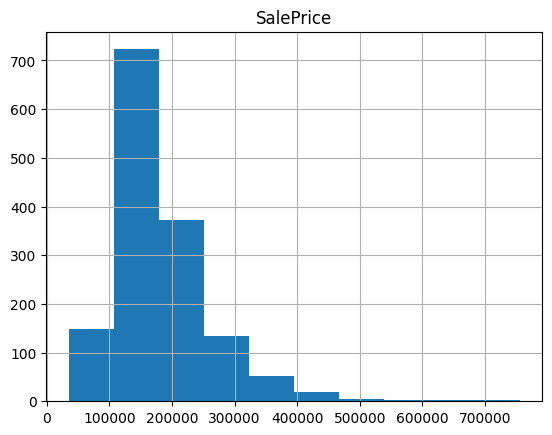

In [ ]:
df.hist(['SalePrice'])

Métricas

In [ ]:
rmse_prices = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rmse_prices

np.float64(43500.86110626331)

Al igual que antes, un error de 43500 puede ser significativo para casas de menor valor e insignificante para casas de mayor valor.

Apliquemos LOG

Ahora realicemos el modelado pero aplicando log-transform.

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

Predicción del modelo.

In [ ]:
y_pred_log = model.fit(X_train, y_train_log).predict(X_test)

In [ ]:
y_pred_log

array([11.89852435, 12.61274842, 11.71363755, 12.01513737, 12.57372759,
       11.4165314 , 12.30188998, 11.95805193, 11.41839586, 11.82526193,
       12.15786233, 11.68357245, 11.36530294, 12.18685484, 12.03368189,
       11.70908934, 12.21941807, 11.72870943, 11.88559076, 12.17662367,
       11.90132415, 12.37241789, 11.98906296, 11.68047401, 12.15917522,
       11.92511265, 12.13869182, 11.5418692 , 12.02642208, 12.12176553,
       11.75646438, 12.30100297, 12.20369819, 11.51652333, 12.40138054,
       11.91675437, 11.89868515, 12.26492288, 12.59991687, 11.69724553,
       11.91313893, 12.30774996, 11.69984758, 12.48722299, 11.70897814,
       12.15560146, 11.68329689, 11.69249923, 12.90303549, 11.83257713,
       11.69747712, 12.01402108, 11.74788873, 12.68695777, 11.83354061,
       12.23674283, 12.235995  , 11.76303058, 11.90679472, 11.66211195,
       11.41261819, 11.75540619, 12.56885334, 12.55576299, 12.43969546,
       12.15555449, 11.71987434, 12.53362075, 11.70911649, 11.96

Métricas.

In [ ]:
sigma2 = np.var(y_test_log - y_pred_log)

Inversa de la transformación.

In [ ]:
pred_back = np.expm1(y_pred_log+0.5*sigma2)

In [ ]:
pred_back

array([149893.60153752, 306173.88753827, 124591.14944145, 168433.24058149,
       294456.77949271,  92566.62323214, 224369.34698092, 159087.39297385,
        92739.37318505, 139304.5844819 , 194273.16369958, 120901.02328731,
        87943.94385228, 199988.10286189, 171585.91478808, 124025.76474205,
       206607.58653178, 126483.20995206, 147967.40960194, 197952.41311686,
       150313.86469476, 240765.10283045, 164098.18026526, 120526.9952901 ,
       194528.39126655, 153932.50085371, 190584.29916217, 104927.29859   ,
       170344.73725828, 187385.54502032, 130042.94407655, 224170.41760018,
       203385.11747002, 102301.22033849, 247840.29050342, 152651.24391025,
       149917.70713144, 216226.4635312 , 302270.28582203, 122565.47987182,
       152100.33414119, 225688.01422198, 122884.81959567, 270055.45621203,
       124011.97286565, 193834.43058692, 120867.71185636, 121985.12112674,
       409297.0159988 , 140327.36898505, 122593.86804079, 168245.32400098,
       128932.50055584, 3

In [ ]:
rmse_log_prices = np.sqrt(mean_squared_error(y_test, pred_back))

In [ ]:
rmse_log_prices

np.float64(36209.81890367205)

Ahora si disminuye el error en unos 10 mil, por lo que en este caso si ayuda aplicar la log transform.